EL Dashboard del este proyecto se encuentra en TableuPublic en el siguiente enlace:

https://public.tableau.com/views/Fuga_Empleados_Dashboard/Dashboard1?:language=es-ES&publish=yes&:sid=&:display_count=n&:origin=viz_share_link

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
empleados = pd.DataFrame(pd.read_csv('AbandonoEmpleados.csv', sep = ';', index_col= 'id', na_values='#N/D'))
empleados.head(2)

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7


In [3]:
empleados.shape

(1470, 31)

### Análisis de nulos

In [4]:
empleados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_civil 

In [5]:
empleados.isna().sum().sort_values(ascending = False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

In [6]:
empleados.drop(columns = ["anos_en_puesto", "conciliacion"], inplace = True) #inplace = True es asegurarme que las elimine, para no tener que volver a definir el dataframe
empleados.head(2)

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,incremento_salario_porc,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,11,Alta,Baja,80,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,23,Muy_Alta,Muy_Alta,80,1,10,3,10,1,7


### EDA VARIABLES CATEGORICAS

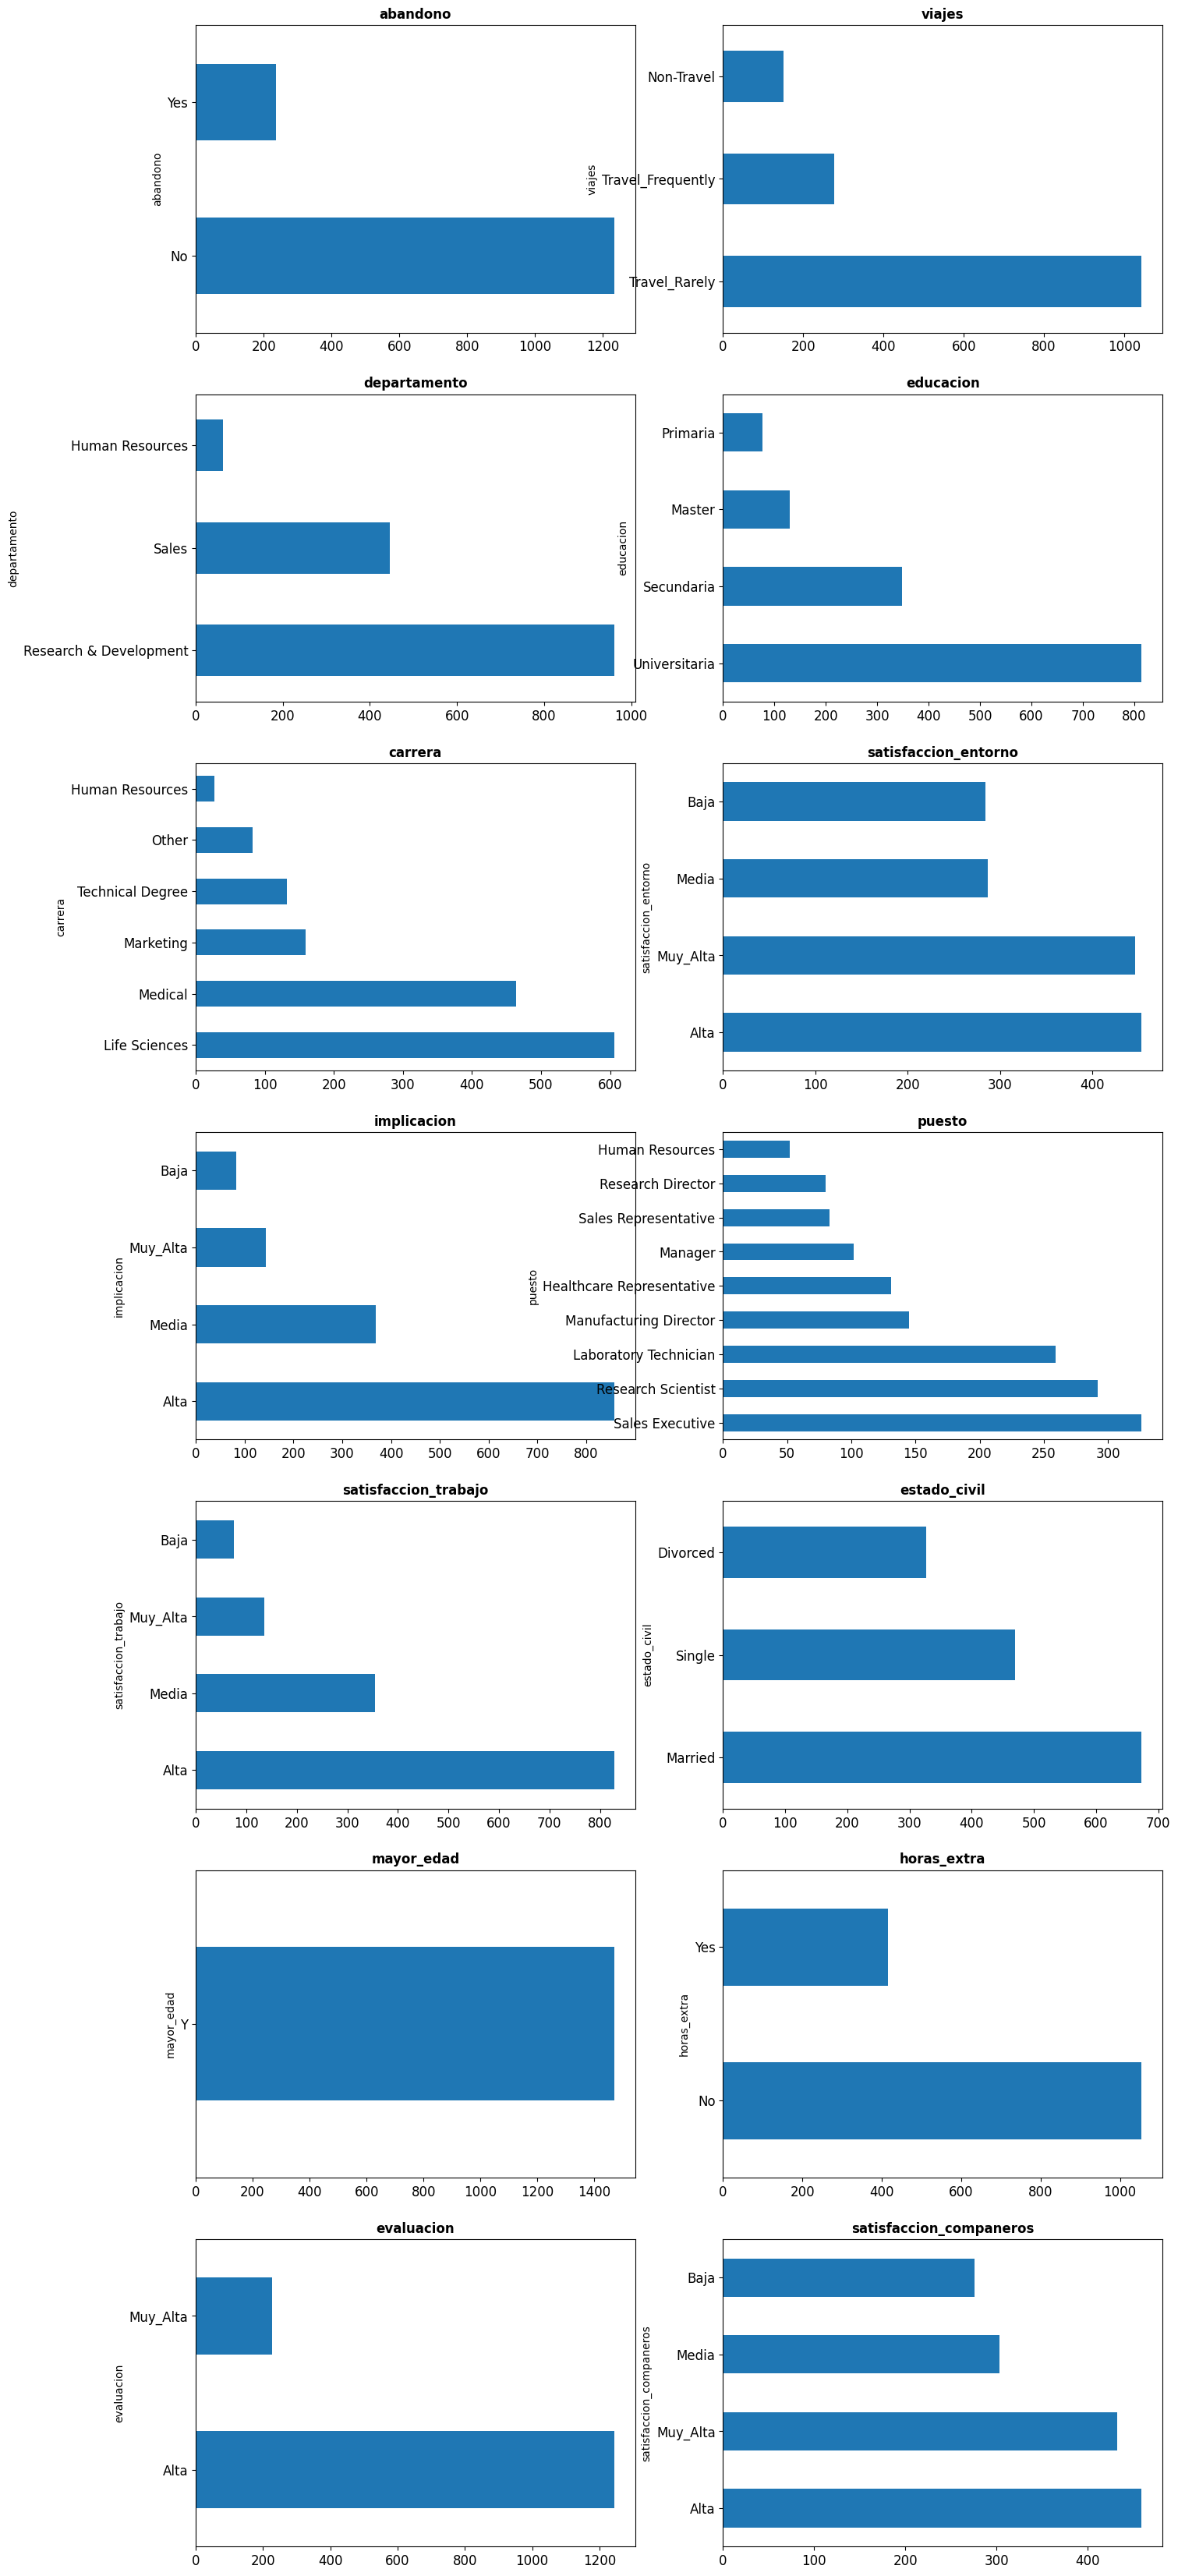

In [7]:
def graficos_categoricos(cat):
    from math import ceil
    filas = ceil(cat.shape[1]/2)

    fig, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))
    ax = ax.flat 

    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)


graficos_categoricos(empleados.select_dtypes("O"))

In [8]:
empleados.drop(columns = ["mayor_edad"], inplace = True)

empleados["educacion"] = empleados["educacion"].fillna("Universitaria")
empleados["satisfaccion_trabajo"] = empleados["satisfaccion_trabajo"].fillna("Alta")
empleados["implicacion"] = empleados["implicacion"].fillna("Alta")

### EDA VARIABLES NUMERICAS

In [9]:
def variables_numericas(num):
    estadistica = num.describe().T
    estadistica["median"] = num.median()
    estadistica = estadistica.iloc[:,[0,1,8,2,3,4,5,6,7]]
    return(estadistica)

variables_numericas(empleados.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


In [10]:
empleados.drop(columns = ["sexo", "empleados", "horas_quincena"], inplace = True)

¿Cuál es la tasa de abandono de la empresa?
La tasa de abandono en la empresa:

In [11]:
(empleados["abandono"].value_counts(normalize = True))*100   #Devuelve el conteo en porcentaje

abandono
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

¿Existe un tipo de perfil de los empleados que abandona la empresa?

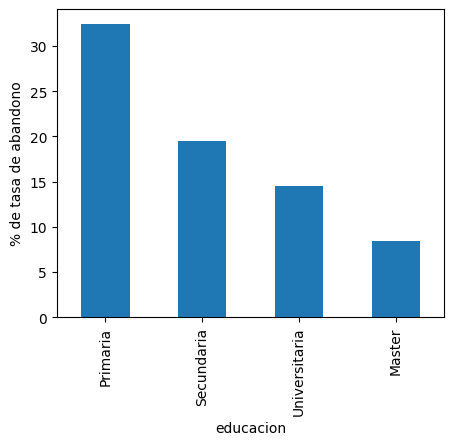

In [12]:
empleados["abandono"] = empleados["abandono"].replace({'Yes': 1, 'No': 0})

temporal = empleados.groupby("educacion")["abandono"].mean().sort_values(ascending = False) * 100

plt.figure(figsize = (5,4))
temporal.plot.bar()
plt.ylabel("% de tasa de abandono")
plt.show()

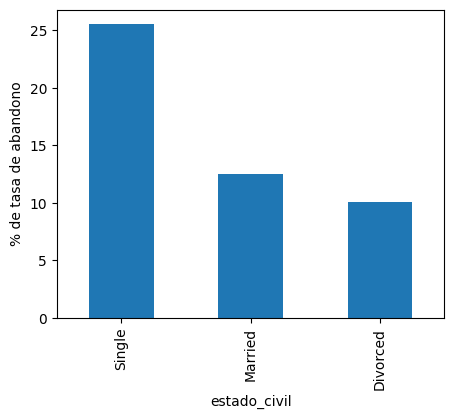

In [13]:
temporal = empleados.groupby("estado_civil")["abandono"].mean().sort_values(ascending = False) * 100

plt.figure(figsize = (5,4))
temporal.plot.bar()
plt.ylabel("% de tasa de abandono")
plt.show()

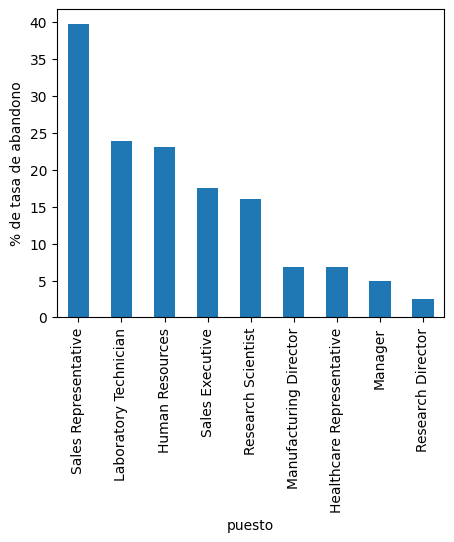

In [14]:
temporal = empleados.groupby("puesto")["abandono"].mean().sort_values(ascending = False) * 100

plt.figure(figsize = (5,4))
temporal.plot.bar()
plt.ylabel("% de tasa de abandono")
plt.show()

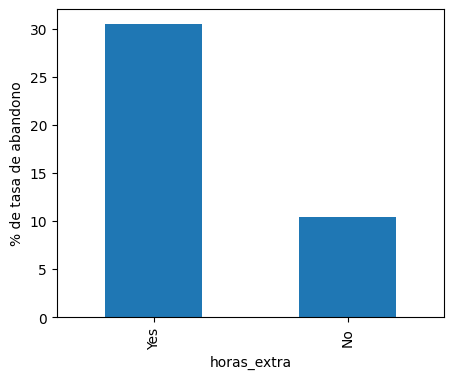

In [15]:
temporal = empleados.groupby("horas_extra")["abandono"].mean().sort_values(ascending = False) * 100

plt.figure(figsize = (5,4))
temporal.plot.bar()
plt.ylabel("% de tasa de abandono")
plt.show()

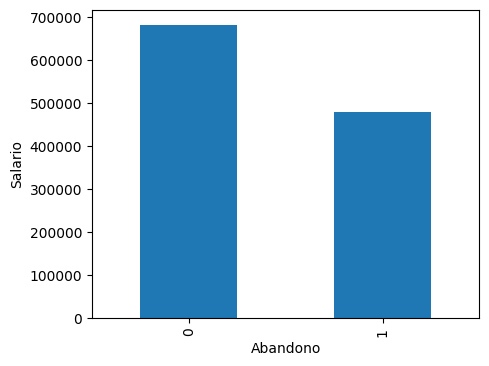

In [16]:
temporal = empleados.groupby("abandono")["salario_mes"].mean().sort_values(ascending = False) * 100

plt.figure(figsize = (5,4))
temporal.plot.bar()
plt.ylabel("Salario")
plt.xlabel("Abandono")
plt.show()

De acuerdo a lo anterior, un perfil de los empleados que abandona son:
Empleado con bajo nivel educativo, es soltero(a), trabaja en ventas, su salario es bajo y tiene una alta carga de horas extras

¿Cuál es el impacto economico del abandono de los empleados?

Según el estudio "Cost of Turnover" del Center for American Progress:

* El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario

* El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario

* El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario

* El coste de la fuga de los empleados que ganan más de 75000 es del 21% de su salario

In [17]:
empleados["salario_ano"] = empleados["salario_mes"] * 12

In [18]:

condicional = [(empleados["salario_ano"] <= 30000),
               (empleados["salario_ano"] > 30000) & (empleados["salario_ano"] <= 50000),
               (empleados["salario_ano"] > 50000) & (empleados["salario_ano"] <= 75000),
               (empleados["salario_ano"] > 75000)]

resultados = [empleados["salario_ano"] * 0.161,
              empleados["salario_ano"] * 0.197,
              empleados["salario_ano"] * 0.204,
              empleados["salario_ano"] * 0.21]

empleados["impacto_de_abandono"] = np.select(condicional, resultados, default = -999)
empleados.head(2)

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_de_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240


In [19]:
impacto = empleados.loc[empleados["abandono"] == 1].impacto_de_abandono.sum()
print(f"El impacto en el ultimo año fue de {impacto} euros")

El impacto en el ultimo año fue de 2719005.912 euros


¿Cuál es el costo de que los empleados no estén motivados?

In [20]:
impacto = empleados.loc[(empleados["abandono"] == 1) & (empleados["implicacion"] == "Baja")].impacto_de_abandono.sum()
print(f"El impacto en el ultimo año fue de {impacto} euros con una implicación baja")

El impacto en el ultimo año fue de 368672.688 euros con una implicación baja


In [21]:
print(f"Reducir un 10% la fuga de empleados nos ahorraría {int(impacto * 0.1)}$ cada año.")
print(f"Reducir un 20% la fuga de empleados nos ahorraría {int(impacto * 0.2)}$ cada año.")
print(f"Reducir un 30% la fuga de empleados nos ahorraría {int(impacto * 0.3)}$ cada año.")

Reducir un 10% la fuga de empleados nos ahorraría 36867$ cada año.
Reducir un 20% la fuga de empleados nos ahorraría 73734$ cada año.
Reducir un 30% la fuga de empleados nos ahorraría 110601$ cada año.


In [22]:
total_repre = len(empleados.loc[empleados.puesto == "Sales Representative"])
abandono_repre = len(empleados.loc[(empleados.puesto == "Sales Representative") & (empleados.abandono == 1)])
porc_repre = abandono_repre / total_repre

print(f"El porcentaje total de los Sales Representative que abandonaron la empresa el ultimo año fue de {round(porc_repre*100,2)}%")

El porcentaje total de los Sales Representative que abandonaron la empresa el ultimo año fue de 39.76%


Los representantes de ventas son el puesto que más se van. ¿Cual sería el coste ahorrado si disminuimos la fuga un 30%?

In [23]:
# 1. Cuantos se irán este año

abandono_repre_prox = len(empleados.loc[(empleados.puesto == "Sales Representative") & (empleados.abandono == 0)])
repre_prox = int(abandono_repre_prox * porc_repre)

print(f"Se estima que se irán {repre_prox}")

Se estima que se irán 19


In [24]:
# 2. Si retenemos el 30% de los empleados, cuanto ahorramos?

retenemos = int(repre_prox * 0.3)

ahorramos = empleados.loc[(empleados.puesto == 'Sales Representative') & (empleados.abandono == 0),'impacto_de_abandono'].sum() * porc_repre * 0.3

print(f'Podemos retener {retenemos} representantes de ventas y ello supondría ahorrar {ahorramos}$.')

Podemos retener 5 representantes de ventas y ello supondría ahorrar 37447.22424578312$.


### MODELO DE MACHINE LEARNING

In [28]:
df_ml = empleados.copy()
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empresas_

In [34]:
from sklearn.preprocessing import OneHotEncoder

cat = df_ml.select_dtypes("O")
ohe = OneHotEncoder(sparse = False)

ohe.fit(cat)

cat_ohe = ohe.transform(cat)
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)


var_num = df_ml.select_dtypes("number").reset_index(drop = True)

df_ml = pd.concat([cat_ohe, var_num], axis = 1)
df_ml.tail(5)

c:\Users\pablo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_de_abandono
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,17,1,17,3,5,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4,15,1,9,5,7,1,7,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,20,1,6,0,6,0,3,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,14,0,17,3,9,0,8,64680,13194.720
1469,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,2,12,0,6,3,4,1,2,52848,10780.992


In [35]:
X = df_ml.drop(columns = "abandono")
y = df_ml["abandono"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [46]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 4)

model.fit(X_train, y_train)

prediction = model.predict_proba(X_test)[:,1] #Probabilidad de que sea un 1.
prediction[:20]

array([0.07692308, 0.06060606, 0.15555556, 0.06060606, 0.06060606,
       0.06060606, 0.7755102 , 0.16770186, 0.06060606, 0.7755102 ,
       0.06060606, 0.15555556, 0.07692308, 0.15555556, 0.07692308,
       0.06060606, 0.06060606, 0.05555556, 0.06060606, 0.06060606])

In [47]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, prediction)

0.6510766873776491

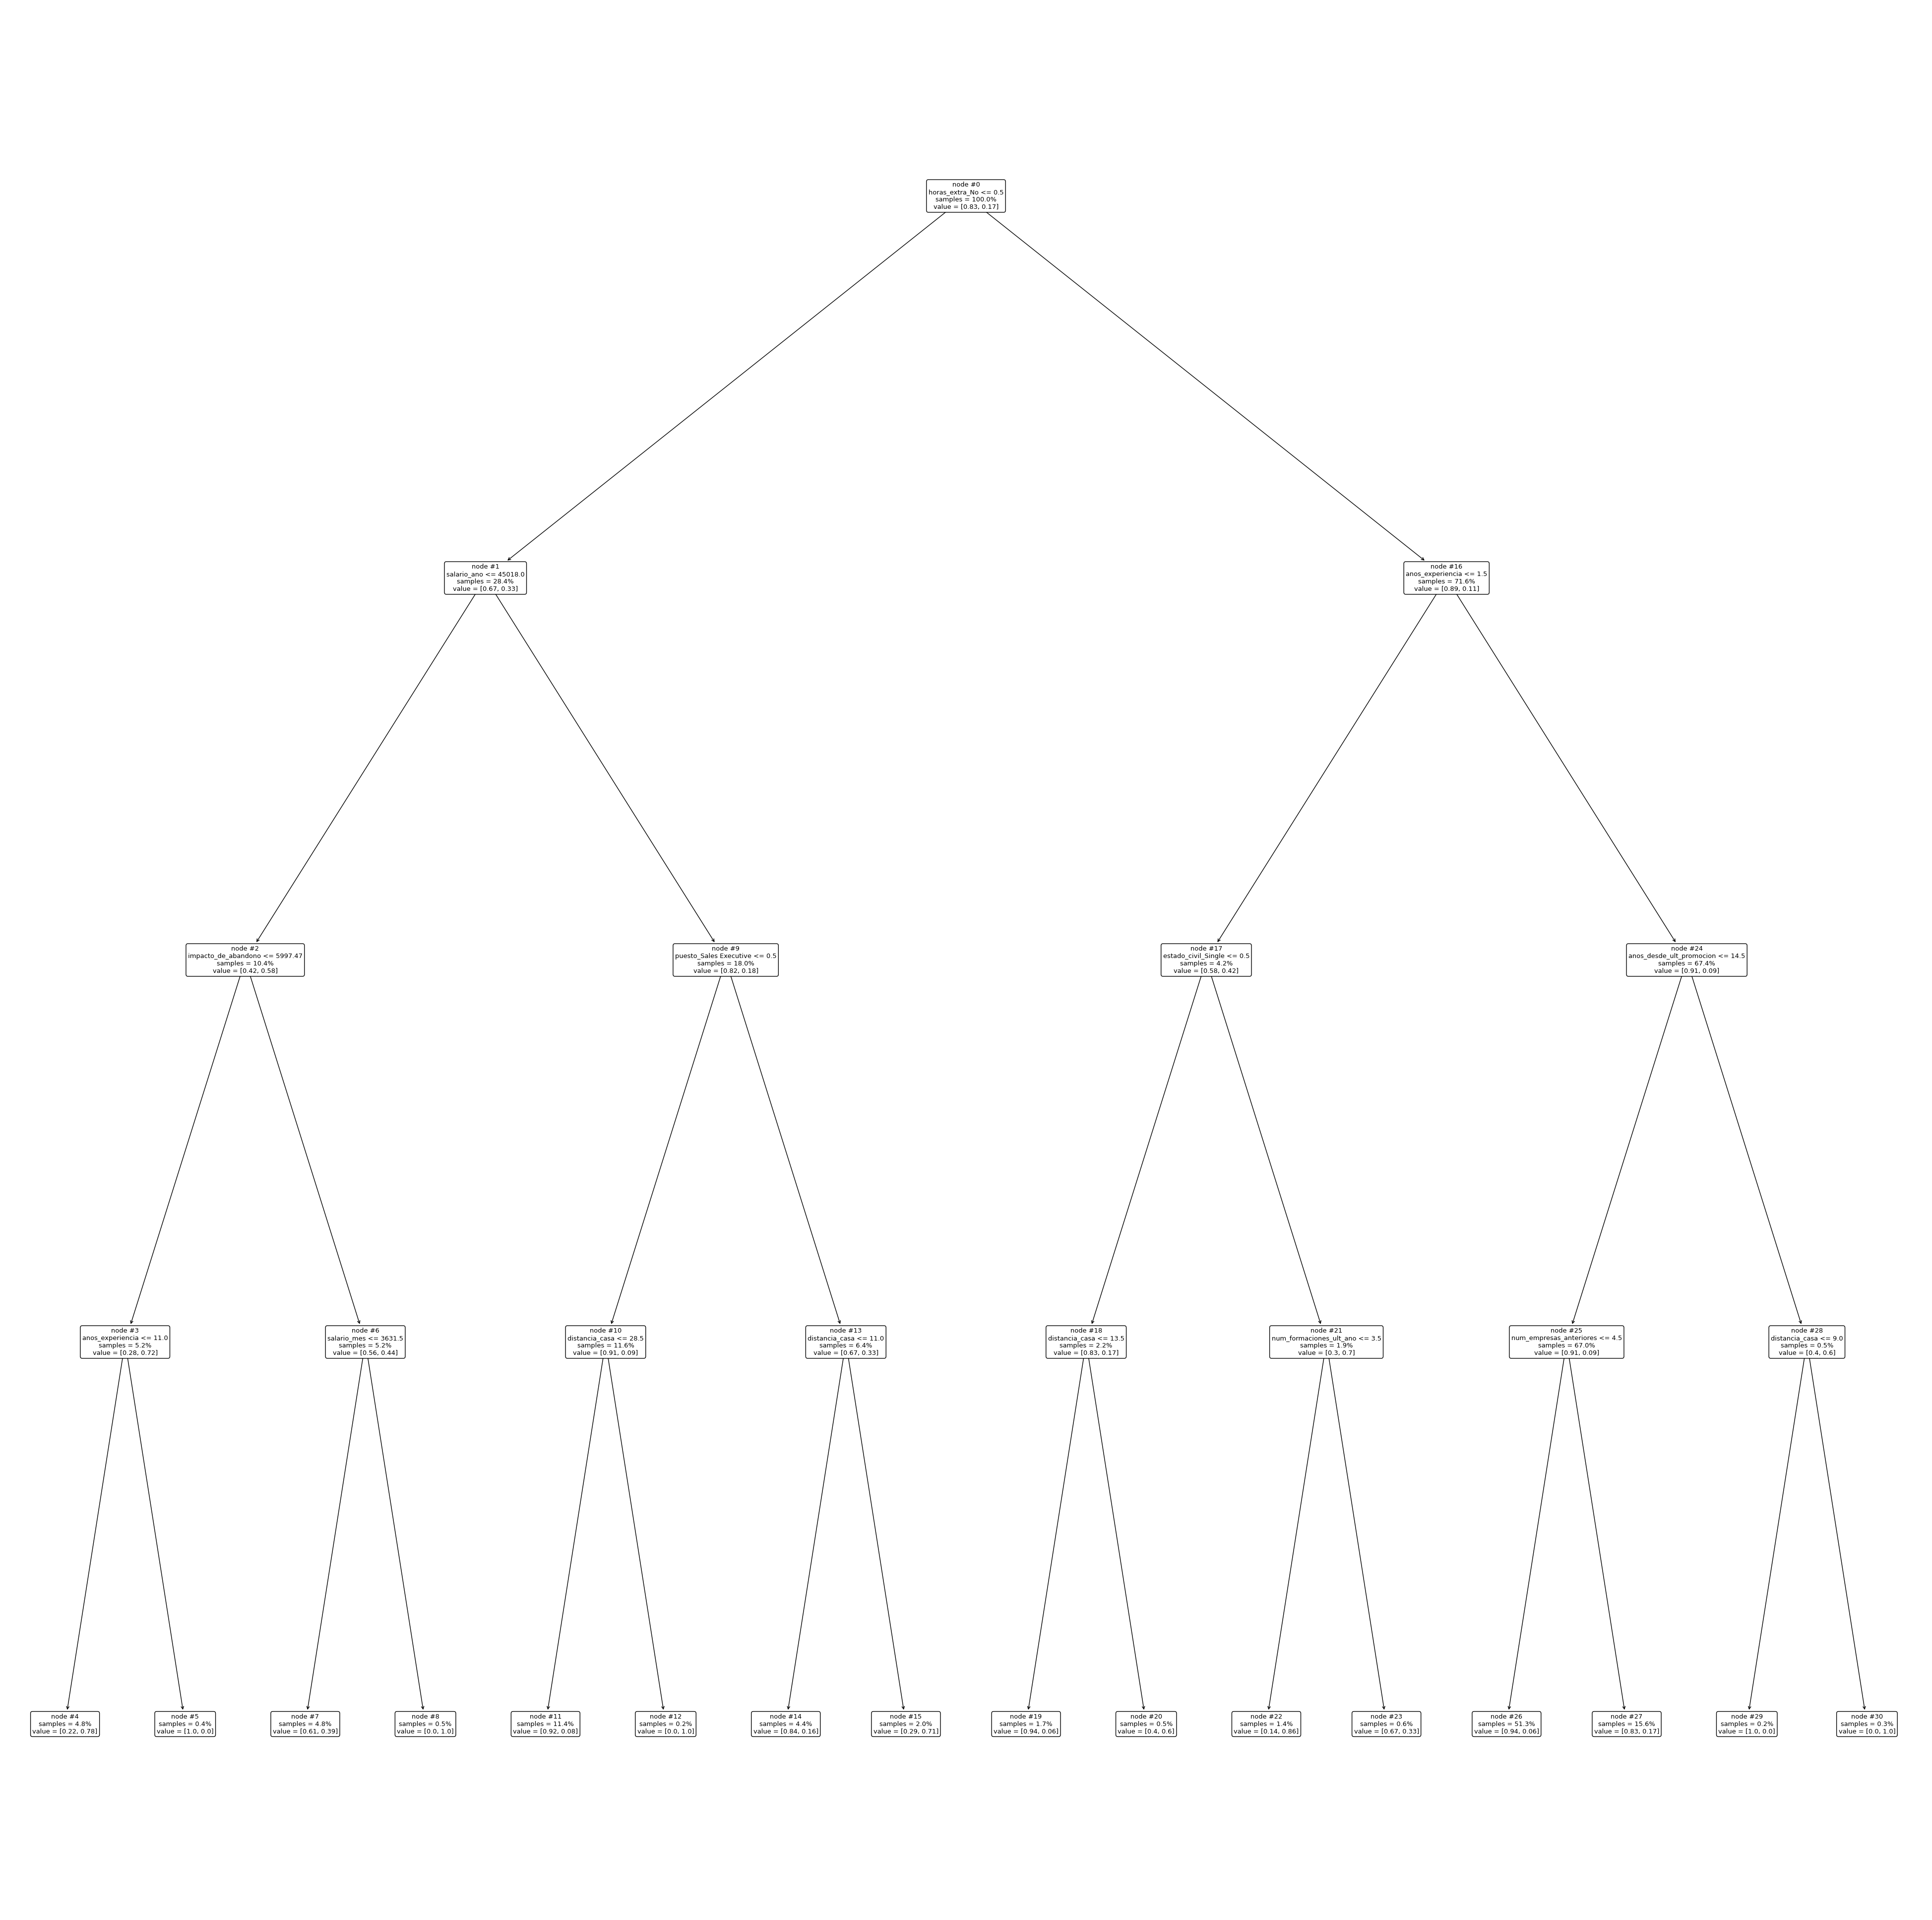

In [49]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50,50))

plot_tree(model,
          feature_names= X_test.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2)
plt.show()

<Axes: >

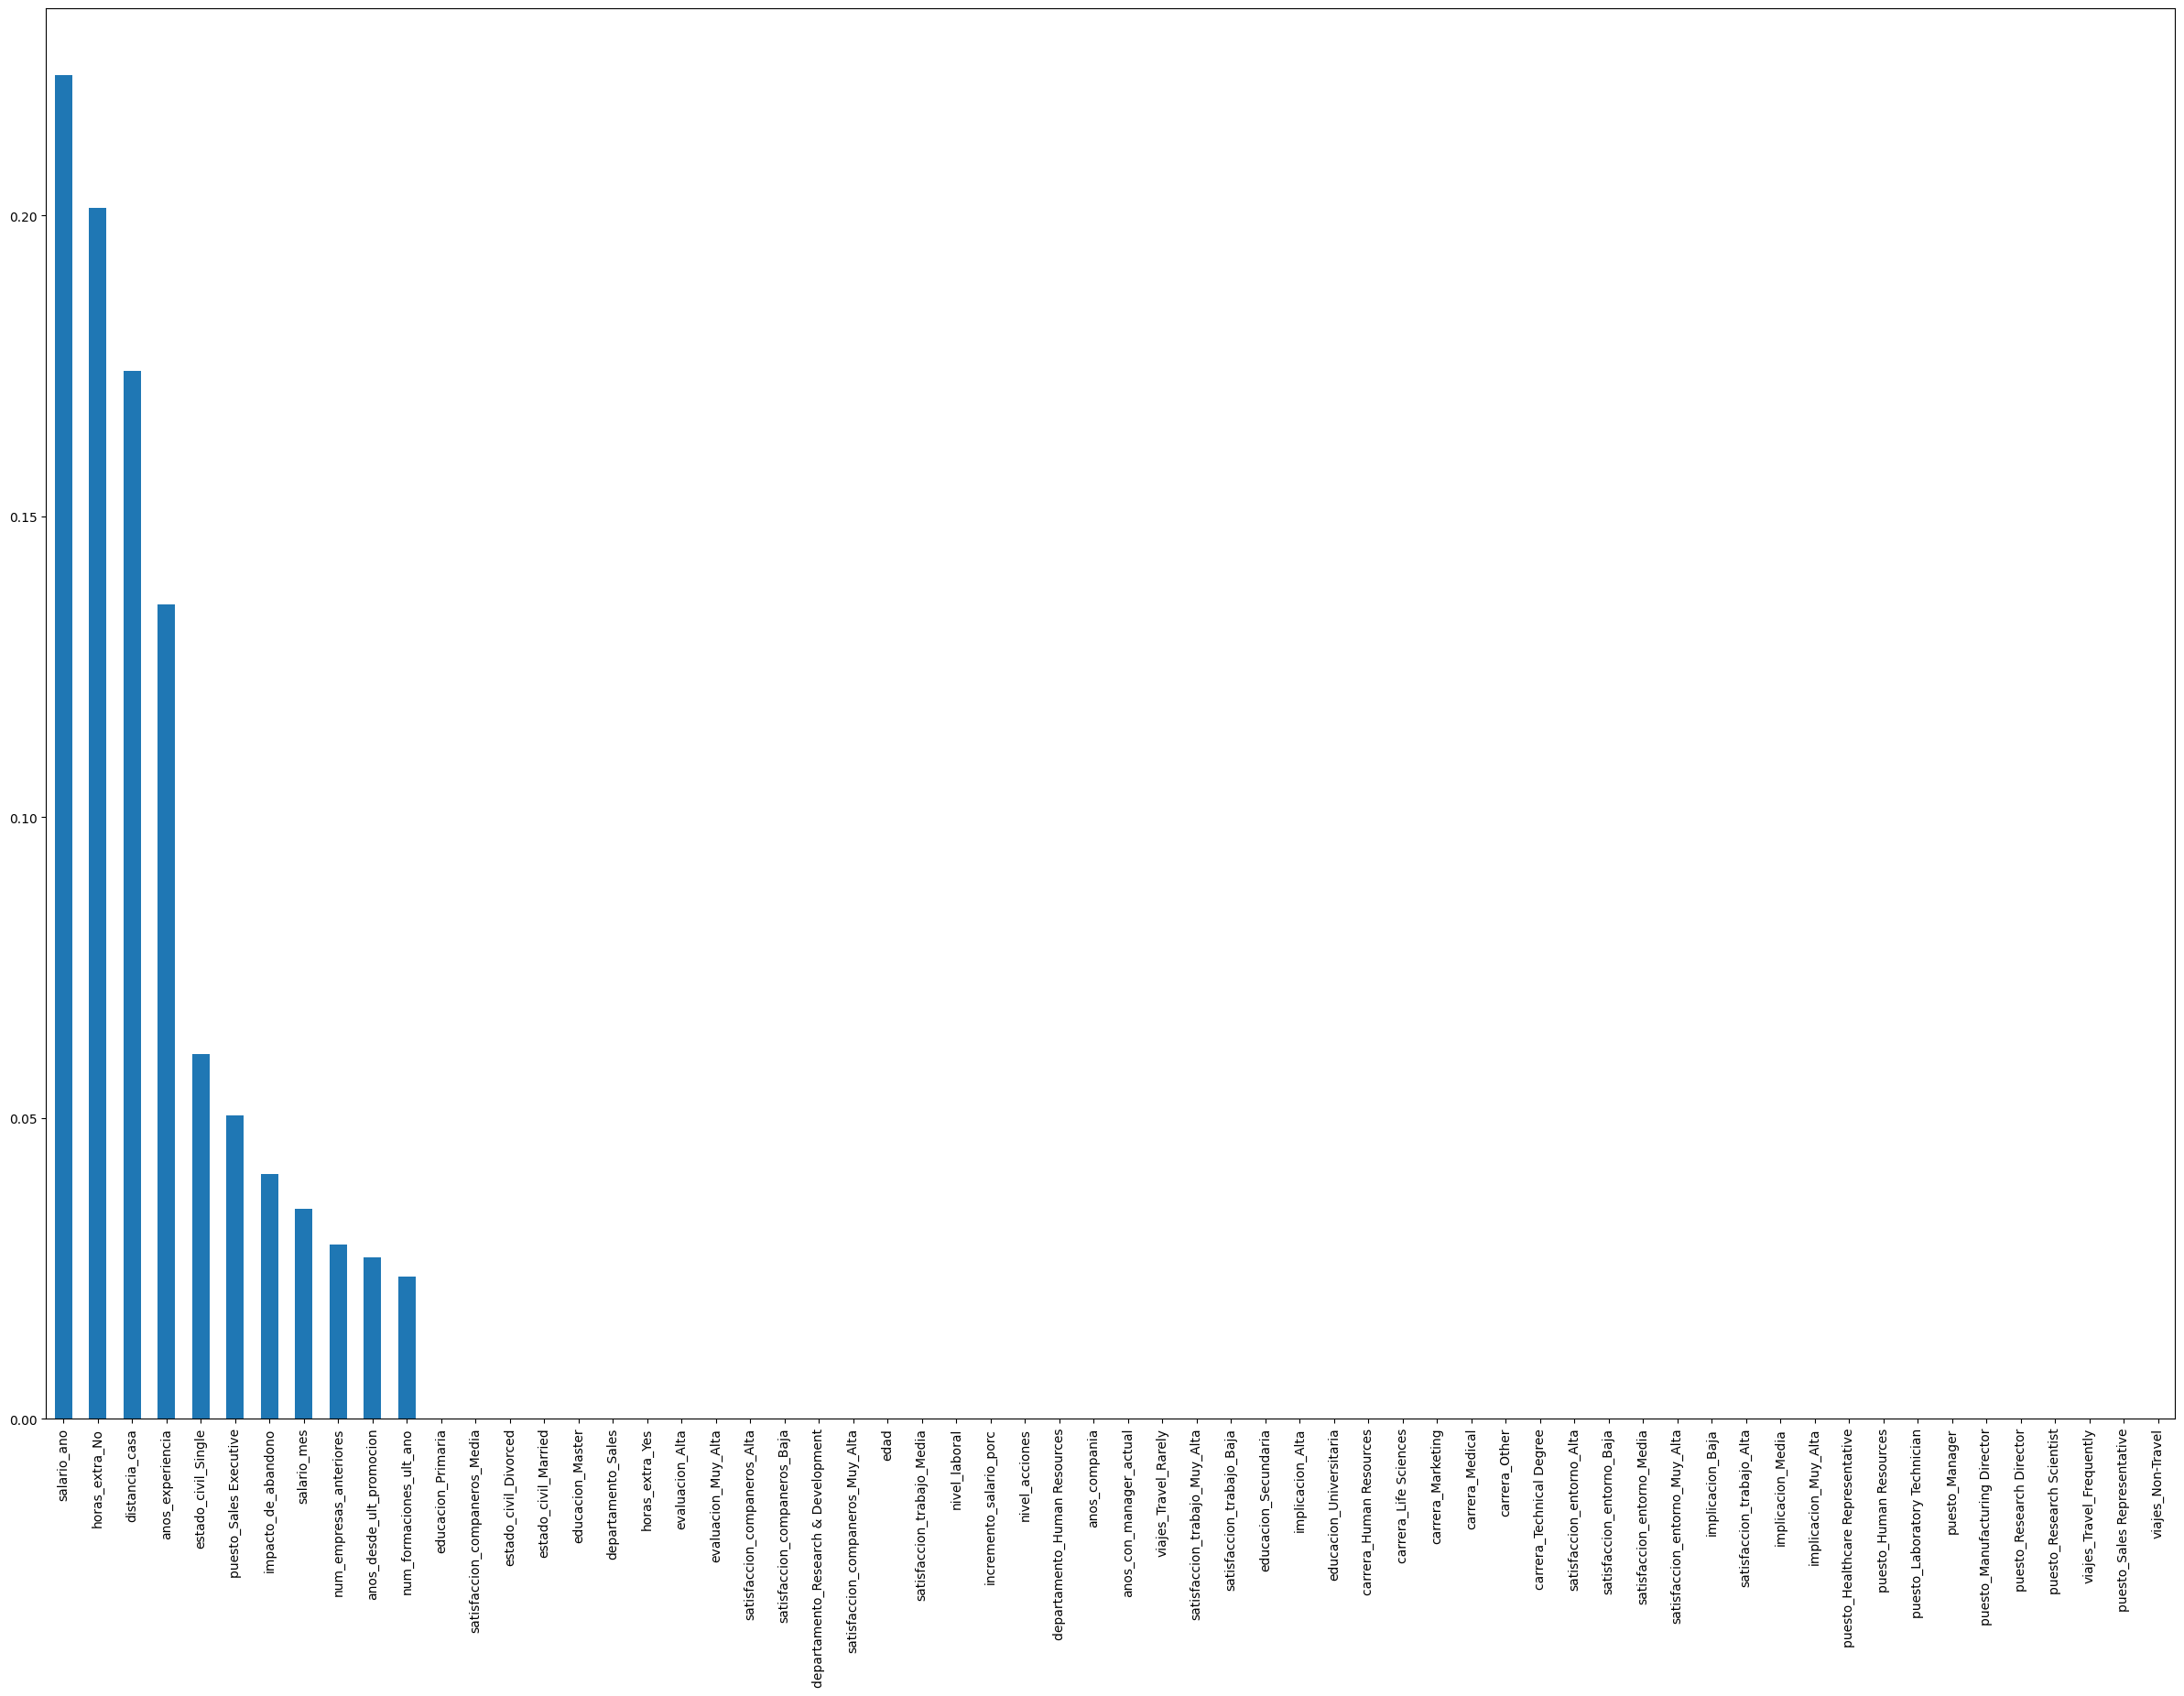

In [50]:
pd.Series(model.feature_importances_,index = X_test.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20))

In [51]:
empleados['scoring_abandono'] = model.predict_proba(df_ml.drop(columns = 'abandono'))[:, 1]
empleados.head(5)

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_de_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.155556
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.060606
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.775510
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.387755
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.167702


In [52]:
empleados.sort_values(by = "scoring_abandono", ascending = False).head(10)

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_de_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1458,39,1,Non-Travel,Research & Development,2,Secundaria,Life Sciences,Baja,Media,1,...,Media,0,11,2,1,0,0,43752,8619.144,1.0
282,38,1,Travel_Rarely,Research & Development,29,Universitaria,Medical,Media,Alta,2,...,Media,0,17,2,1,0,0,80076,16815.960,1.0
58,41,1,Travel_Rarely,Research & Development,12,Universitaria,Technical Degree,Media,Alta,5,...,Muy_Alta,0,23,0,22,15,8,234540,49253.400,1.0
376,47,1,Non-Travel,Research & Development,29,Universitaria,Life Sciences,Baja,Alta,3,...,Muy_Alta,1,10,2,10,9,9,142188,29859.480,1.0
1464,31,1,Travel_Frequently,Research & Development,2,Universitaria,Life Sciences,Media,Alta,1,...,Alta,1,7,2,2,2,2,44664,8798.808,1.0
1465,45,0,Travel_Rarely,Research & Development,29,Universitaria,Technical Degree,Media,Alta,3,...,Muy_Alta,2,10,4,3,1,2,112560,23637.600,1.0
1106,25,1,Travel_Rarely,Research & Development,4,Universitaria,Technical Degree,Muy_Alta,Alta,1,...,Media,1,7,3,7,5,6,44292,8725.524,1.0
331,32,1,Travel_Rarely,Research & Development,1,Secundaria,Life Sciences,Muy_Alta,Media,1,...,Muy_Alta,0,4,2,3,1,2,44760,8817.720,1.0
1042,36,1,Travel_Rarely,Research & Development,16,Master,Life Sciences,Alta,Muy_Alta,1,...,Alta,0,18,1,17,15,14,32916,6484.452,1.0


### SCORING DE ABANDONO DE EMPLEADOS POR PUESTO DE TRABAJO

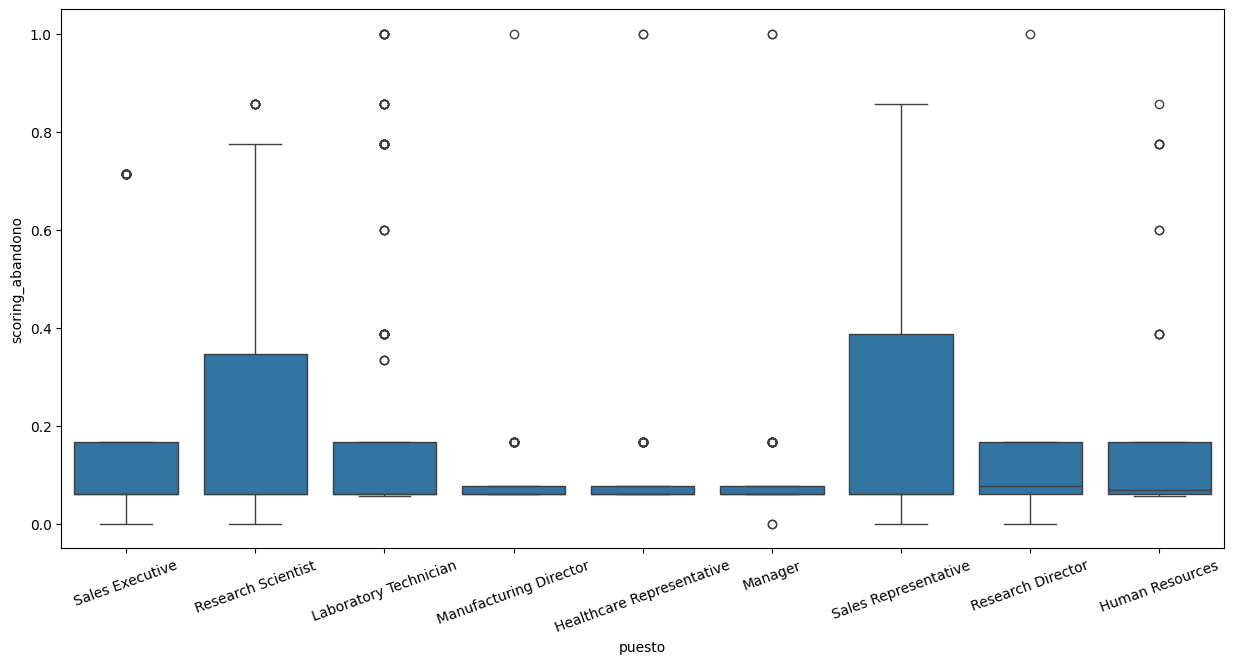

In [60]:
plt.figure(figsize = (15,7))
sns.boxplot(empleados, x = "puesto", y = "scoring_abandono")
plt.xticks(rotation = 20)
plt.show()

In [62]:
empleados.to_excel("Resultado_scoring_abandono.xlsx")